In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
car_dataset=pd.read_csv("/content/archive (2).zip")
print(car_dataset.head)

<bound method NDFrame.head of            Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3      

In [4]:
car_dataset.shape

(10000, 10)

In [5]:
#getting more info
car_dataset.info()
car_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [6]:
#checking the categorical data
print(car_dataset.Fuel_Type.value_counts())

Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64


In [7]:
#encoding the categorical data
car_dataset.replace({'Fuel_Type': {'Electric': 0, 'Diesel': 1, 'Hybrid': 2, 'Petrol': 3}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Semi-Automatic': 1, 'Automatic': 2}}, inplace=True)

<ipython-input-7-97bd26fa4b03>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Electric': 0, 'Diesel': 1, 'Hybrid': 2, 'Petrol': 3}}, inplace=True)
<ipython-input-7-97bd26fa4b03>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission': {'Manual': 0, 'Semi-Automatic': 1, 'Automatic': 2}}, inplace=True)


In [8]:
#Splitting the data in test data and training data
x=car_dataset.drop(['Brand','Price','Model'],axis=1)
y=car_dataset['Price']
print(x)
print(y)

      Year  Engine_Size  Fuel_Type  Transmission  Mileage  Doors  Owner_Count
0     2020          4.2          1             0   289944      3            5
1     2012          2.0          2             2     5356      2            3
2     2020          4.2          1             2   231440      4            2
3     2023          2.0          0             0   160971      2            1
4     2003          2.6          2             1   286618      3            3
...    ...          ...        ...           ...      ...    ...          ...
9995  2004          3.7          1             1     5794      2            4
9996  2002          1.4          0             2   168000      2            1
9997  2010          3.0          3             2    86664      5            1
9998  2002          1.4          2             2   225772      4            1
9999  2001          2.1          1             0   157882      3            3

[10000 rows x 7 columns]
0        8501
1       12092
2       11

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [31]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

9000
9000
1000
1000


In [56]:
X_train.head()

,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count
4480,2005,2.9,0,2,187906,5,2
3373,2012,3.1,0,2,57470,5,3
5861,2013,1.3,3,2,116174,4,2
8201,2020,1.2,3,1,108945,2,1
273,2016,1.4,3,1,278559,5,4


In [41]:
#train model
linear_regression=LinearRegression()
linear_regression.fit(X_train,Y_train)

LinearRegression()

In [42]:
#model evaluation - prediction on training data
training_data_prediction=linear_regression.predict(X_test)

In [44]:
# R squared error
error_score=metrics.r2_score(Y_test,training_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.9490950770743257


In [45]:
training_data_prediction.size

1000

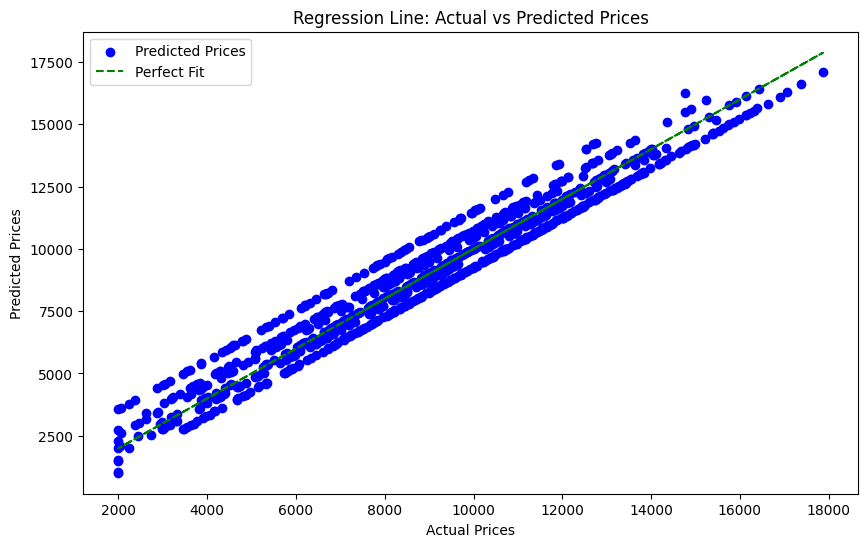

In [53]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction, color="blue", label="Predicted Prices")
plt.plot(Y_test, Y_test, color="green", linestyle="dashed", label="Perfect Fit")  # Ideal regression line

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Line: Actual vs Predicted Prices")
plt.legend()
plt.show()


In [49]:
lasso_regression=Lasso()
lasso_regression.fit(X_train,Y_train)
test_data_prediction=lasso_regression.predict(X_test)

In [50]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.949088727985933


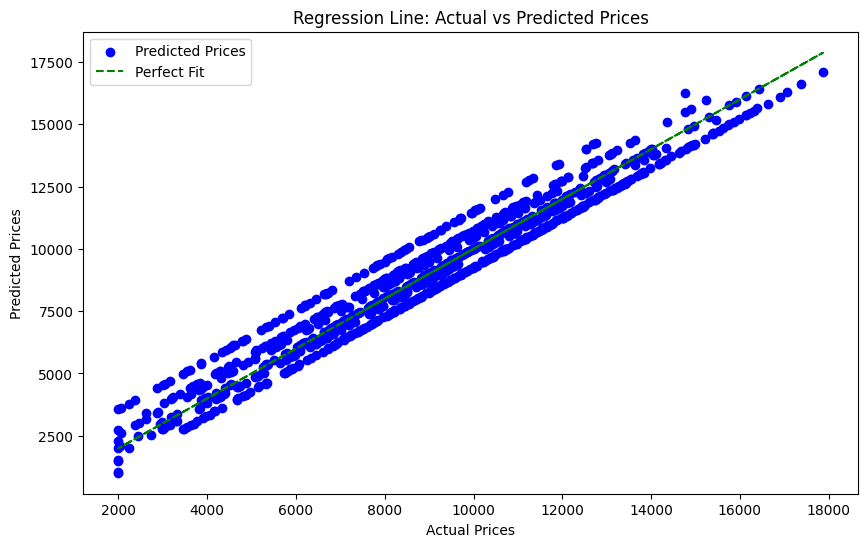

In [54]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction, color="blue", label="Predicted Prices")
plt.plot(Y_test, Y_test, color="green", linestyle="dashed", label="Perfect Fit")  # Ideal regression line

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Line: Actual vs Predicted Prices")
plt.legend()
plt.show()


In [60]:
y_pred_test = np.array([[2006, 3.0, 3, 2, 57470, 5, 3]])  # Convert to 2D array
yes_pred = lasso_regression.predict(y_pred_test)
print(yes_pred)

[9007.68937441]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
